In [1]:
# Install pyreadr to read R-Files
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### The TEP variables (columns 4 to 55) were sampled every 3 minutes for a total duration of 25 hours and 48 hours respectively. 

### The faults were introduced 1 hour into the Faulty Training 
### and 8 hours  into Faulty Testing datasets

In [2]:
# Only Training data is used

df_FaultFree = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_Faulty_Training.RData')['faulty_training']

In [3]:
DF = pd.concat([df_FaultFree,df_Faulty]) # Join both fault free and faulty dataset

In [4]:
DF

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  \
0                0.0            1.0       1  0.25038   3674.0   4529.0   
1                0.0            1.0       2  0.25109   3659.4   4556.6   
2                0.0            1.0       3  0.25038   3660.3   4477.8   
3                0.0            1.0       4  0.24977   3661.3   4512.1   
4                0.0            1.0       5  0.29405   3679.0   4497.0   
...              ...            ...     ...      ...      ...      ...   
4999995         20.0          500.0     496  0.23419   3655.3   4461.7   
4999996         20.0          500.0     497  0.26704   3647.4   4540.2   
4999997         20.0          500.0     498  0.26543   3630.3   4571.6   
4999998         20.0          500.0     499  0.27671   3655.7   4498.9   
4999999         20.0          500.0     500  0.27421   3640.4   4474.4   

         xmeas_4  xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4  \
0         9.2320   26.889   42.402   2704.3  ...  53.744  24.657  62.544   
1         9.4264   26.721   42.576   2705.0  ...  53.414  24.588  59.259   
2         9.4426   26.875   42.070   2706.2  ...  54.357  24.666  61.275   
3         9.4776   26.758   42.063   2707.2  ...  53.946  24.725  59.856   
4         9.3381   26.889   42.650   2705.1  ...  53.658  28.797  60.717   
...          ...      ...      ...      ...  ...     ...     ...     ...   
4999995   9.3448   27.008   42.481   2703.0  ...  53.670  23.350  61.061   
4999996   9.3546   27.034   42.671   2704.7  ...  54.650  26.362  60.020   
4999997   9.4089   27.129   42.470   2705.1  ...  54.274  26.521  59.824   
4999998   9.3781   27.353   42.281   2705.8  ...  53.506  26.781  62.818   
4999999   9.3866   27.145   41.985   2706.0  ...  53.800  27.027  59.757   

          xmv_5   xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0        22.137  39.935  42.323  47.757  47.510  41.258  18.447  
1        22.084  40.176  38.554  43.692  47.427  41.359  17.194  
2        22.380  40.244  38.990  46.699  47.468  41.199  20.530  
3        22.277  40.257  38.072  47.541  47.658  41.643  18.089  
4        21.947  39.144  41.955  47.645  47.346  41.507  18.461  
...         ...     ...     ...     ...     ...     ...     ...  
4999995  20.719  40.999  38.653  47.386  47.528  40.212  17.659  
4999996  20.263  41.579  33.624  47.536  47.647  41.199  18.741  
4999997  20.189  41.505  40.967  52.437  47.802  41.302  23.199  
4999998  20.453  40.208  40.957  47.628  48.086  40.510  15.932  
4999999  20.157  40.326  36.039  48.885  48.170  41.115  15.752  

[5250000 rows x 55 columns]

# Data Visulatization

## For the FaultFree case

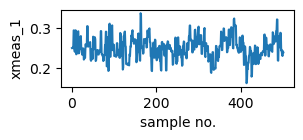

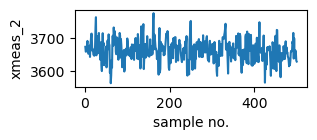

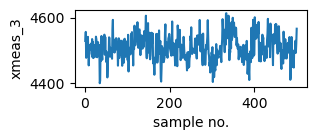

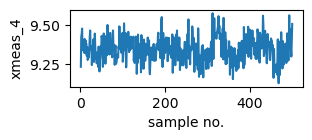

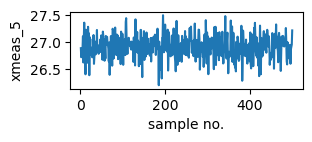

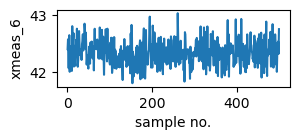

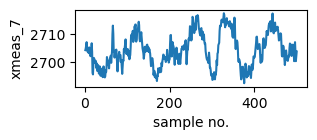

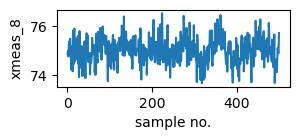

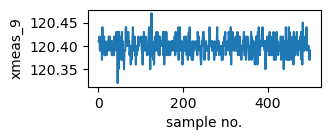

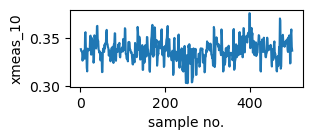

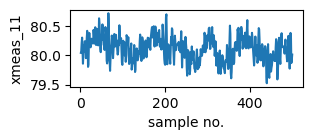

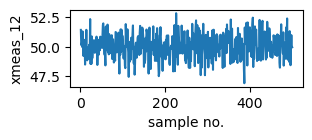

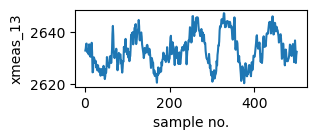

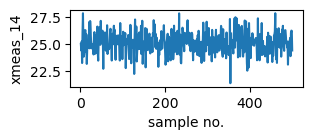

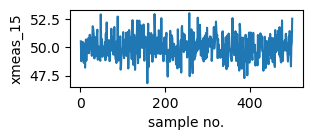

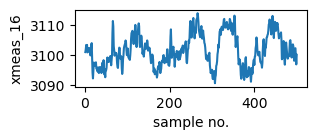

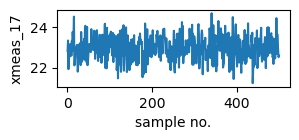

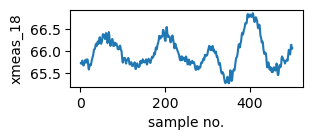

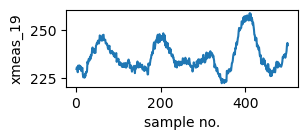

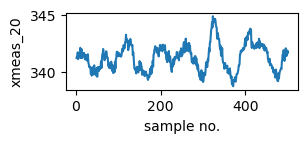

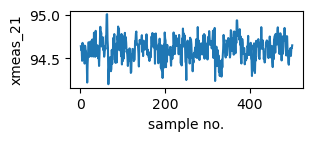

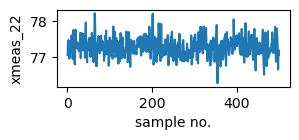

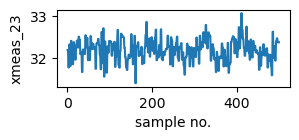

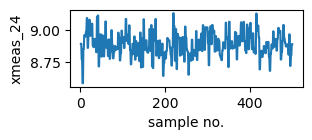

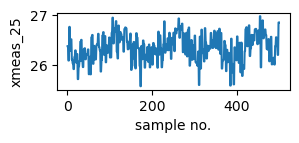

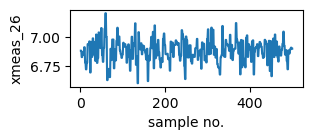

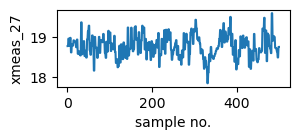

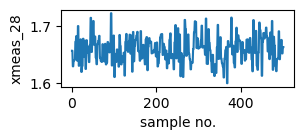

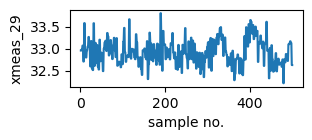

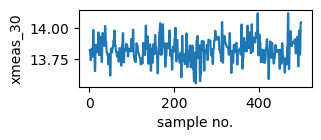

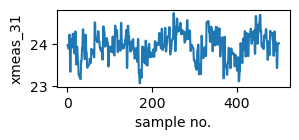

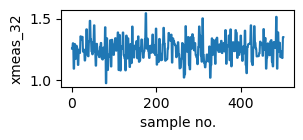

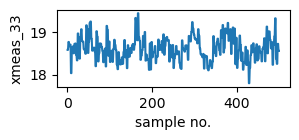

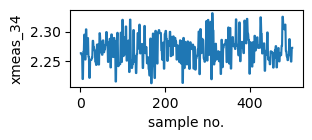

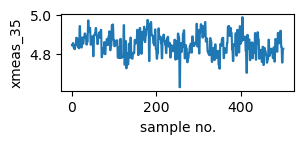

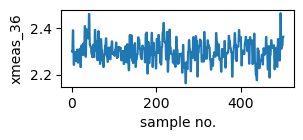

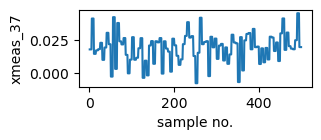

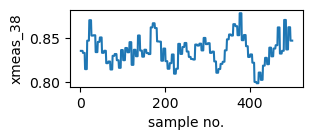

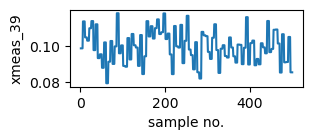

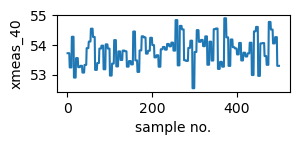

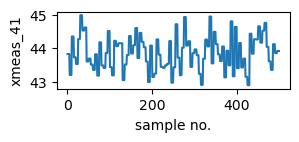

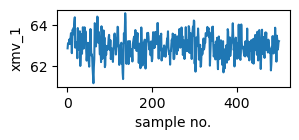

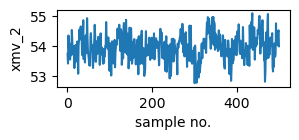

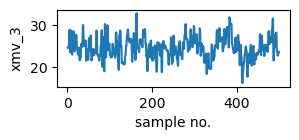

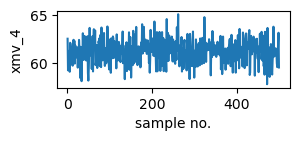

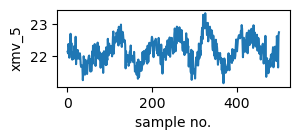

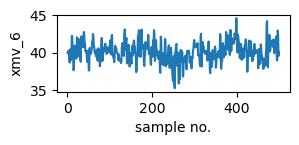

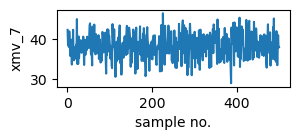

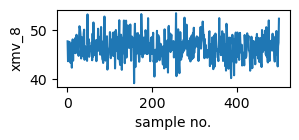

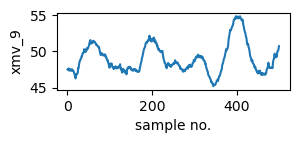

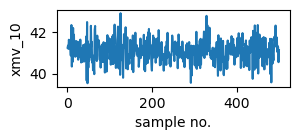

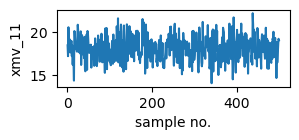

In [9]:
# faultfree case of simulation run-1

pp=DF[ (DF['faultNumber']==0) & (DF['simulationRun']==1) ] #Select simulationRun=1

for col in DF.columns[3:]:  #select all the feature columns to plot
    plt.rcParams['figure.figsize'] = [3, 1]
    plt.plot(pp['sample'],pp[col])
    plt.xlabel('sample no.')
    plt.ylabel(col)
    plt.show()

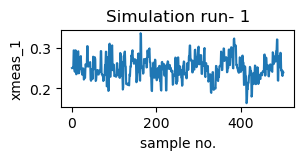

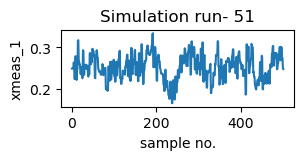

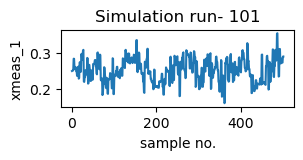

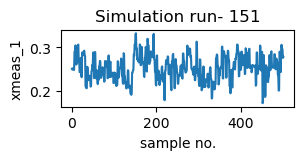

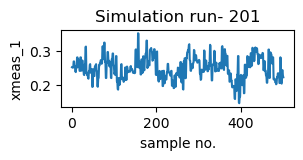

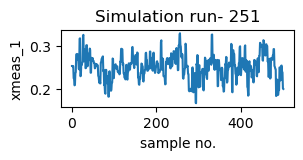

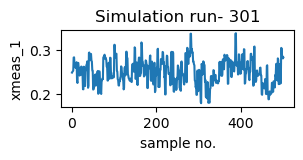

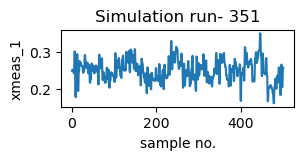

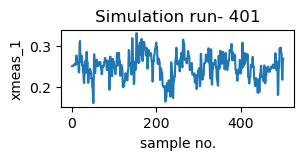

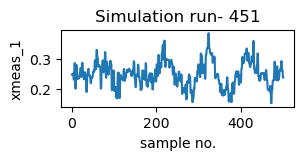

In [12]:
# faultfree case of various simulation runs for s single feature, col='xmeas_3' 

col='xmeas_1'

for simRun in np.arange(1,500,50):  #select Select simulationRun
    pp=DF[ (DF['faultNumber']==0) & (DF['simulationRun']==simRun) ]
    plt.rcParams['figure.figsize'] = [3, 1]
    plt.plot(pp['sample'],pp[col])
    plt.xlabel('sample no.')
    plt.ylabel(col)
    plt.title(f'Simulation run- {simRun}')
    plt.show()

# Basic Statistics based Fault detection

In [13]:
# Get all the simulation run data for FaultFree case
normal_data=DF[ (DF['faultNumber']==0)].iloc[:,3:] 

In [14]:
normal_data

xmeas_1  xmeas_2  xmeas_3  xmeas_4  xmeas_5  xmeas_6  xmeas_7  \
0       0.25038   3674.0   4529.0   9.2320   26.889   42.402   2704.3   
1       0.25109   3659.4   4556.6   9.4264   26.721   42.576   2705.0   
2       0.25038   3660.3   4477.8   9.4426   26.875   42.070   2706.2   
3       0.24977   3661.3   4512.1   9.4776   26.758   42.063   2707.2   
4       0.29405   3679.0   4497.0   9.3381   26.889   42.650   2705.1   
...         ...      ...      ...      ...      ...      ...      ...   
249995  0.29325   3640.1   4473.0   9.1949   26.867   42.379   2700.2   
249996  0.29134   3625.7   4506.2   9.2109   26.889   42.291   2700.6   
249997  0.29438   3600.2   4478.3   9.1957   26.820   42.448   2700.3   
249998  0.25269   3683.5   4486.4   9.2832   27.188   42.757   2697.4   
249999  0.25214   3648.2   4467.8   9.1344   26.886   42.534   2695.1   

        xmeas_8  xmeas_9  xmeas_10  ...   xmv_2   xmv_3   xmv_4   xmv_5  \
0        74.863   120.41   0.33818  ...  53.744  24.657  62.544  22.137   
1        75.000   120.41   0.33620  ...  53.414  24.588  59.259  22.084   
2        74.771   120.42   0.33563  ...  54.357  24.666  61.275  22.380   
3        75.224   120.39   0.33553  ...  53.946  24.725  59.856  22.277   
4        75.388   120.39   0.32632  ...  53.658  28.797  60.717  21.947   
...         ...      ...       ...  ...     ...     ...     ...     ...   
249995   75.533   120.41   0.34050  ...  53.429  29.249  60.773  21.532   
249996   75.935   120.39   0.35374  ...  53.830  28.975  61.517  21.750   
249997   74.706   120.41   0.35910  ...  54.163  28.676  61.656  21.487   
249998   75.101   120.39   0.32469  ...  53.453  24.889  61.564  21.392   
249999   74.787   120.41   0.32751  ...  53.676  24.943  61.254  21.208   

         xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0       39.935  42.323  47.757  47.510  41.258  18.447  
1       40.176  38.554  43.692  47.427  41.359  17.194  
2       40.244  38.990  46.699  47.468  41.199  20.530  
3       40.257  38.072  47.541  47.658  41.643  18.089  
4       39.144  41.955  47.645  47.346  41.507  18.461  
...        ...     ...     ...     ...     ...     ...  
249995  40.451  34.064  48.953  48.291  40.812  18.756  
249996  42.762  42.645  51.055  48.589  40.933  19.360  
249997  42.109  39.770  46.770  48.648  41.465  19.344  
249998  39.334  42.274  43.623  48.797  39.835  18.512  
249999  38.991  42.873  44.400  48.876  41.076  16.158  

[250000 rows x 52 columns]

## Calculate mean and standard deviation of each variable

In [15]:
mean = normal_data.mean(axis=0)
std  = normal_data.std(axis=0)

#upper threshold 
upperLimit=mean+3*std 
#lower threshold
lowerLimit=mean-3*std

# Fault Free Case

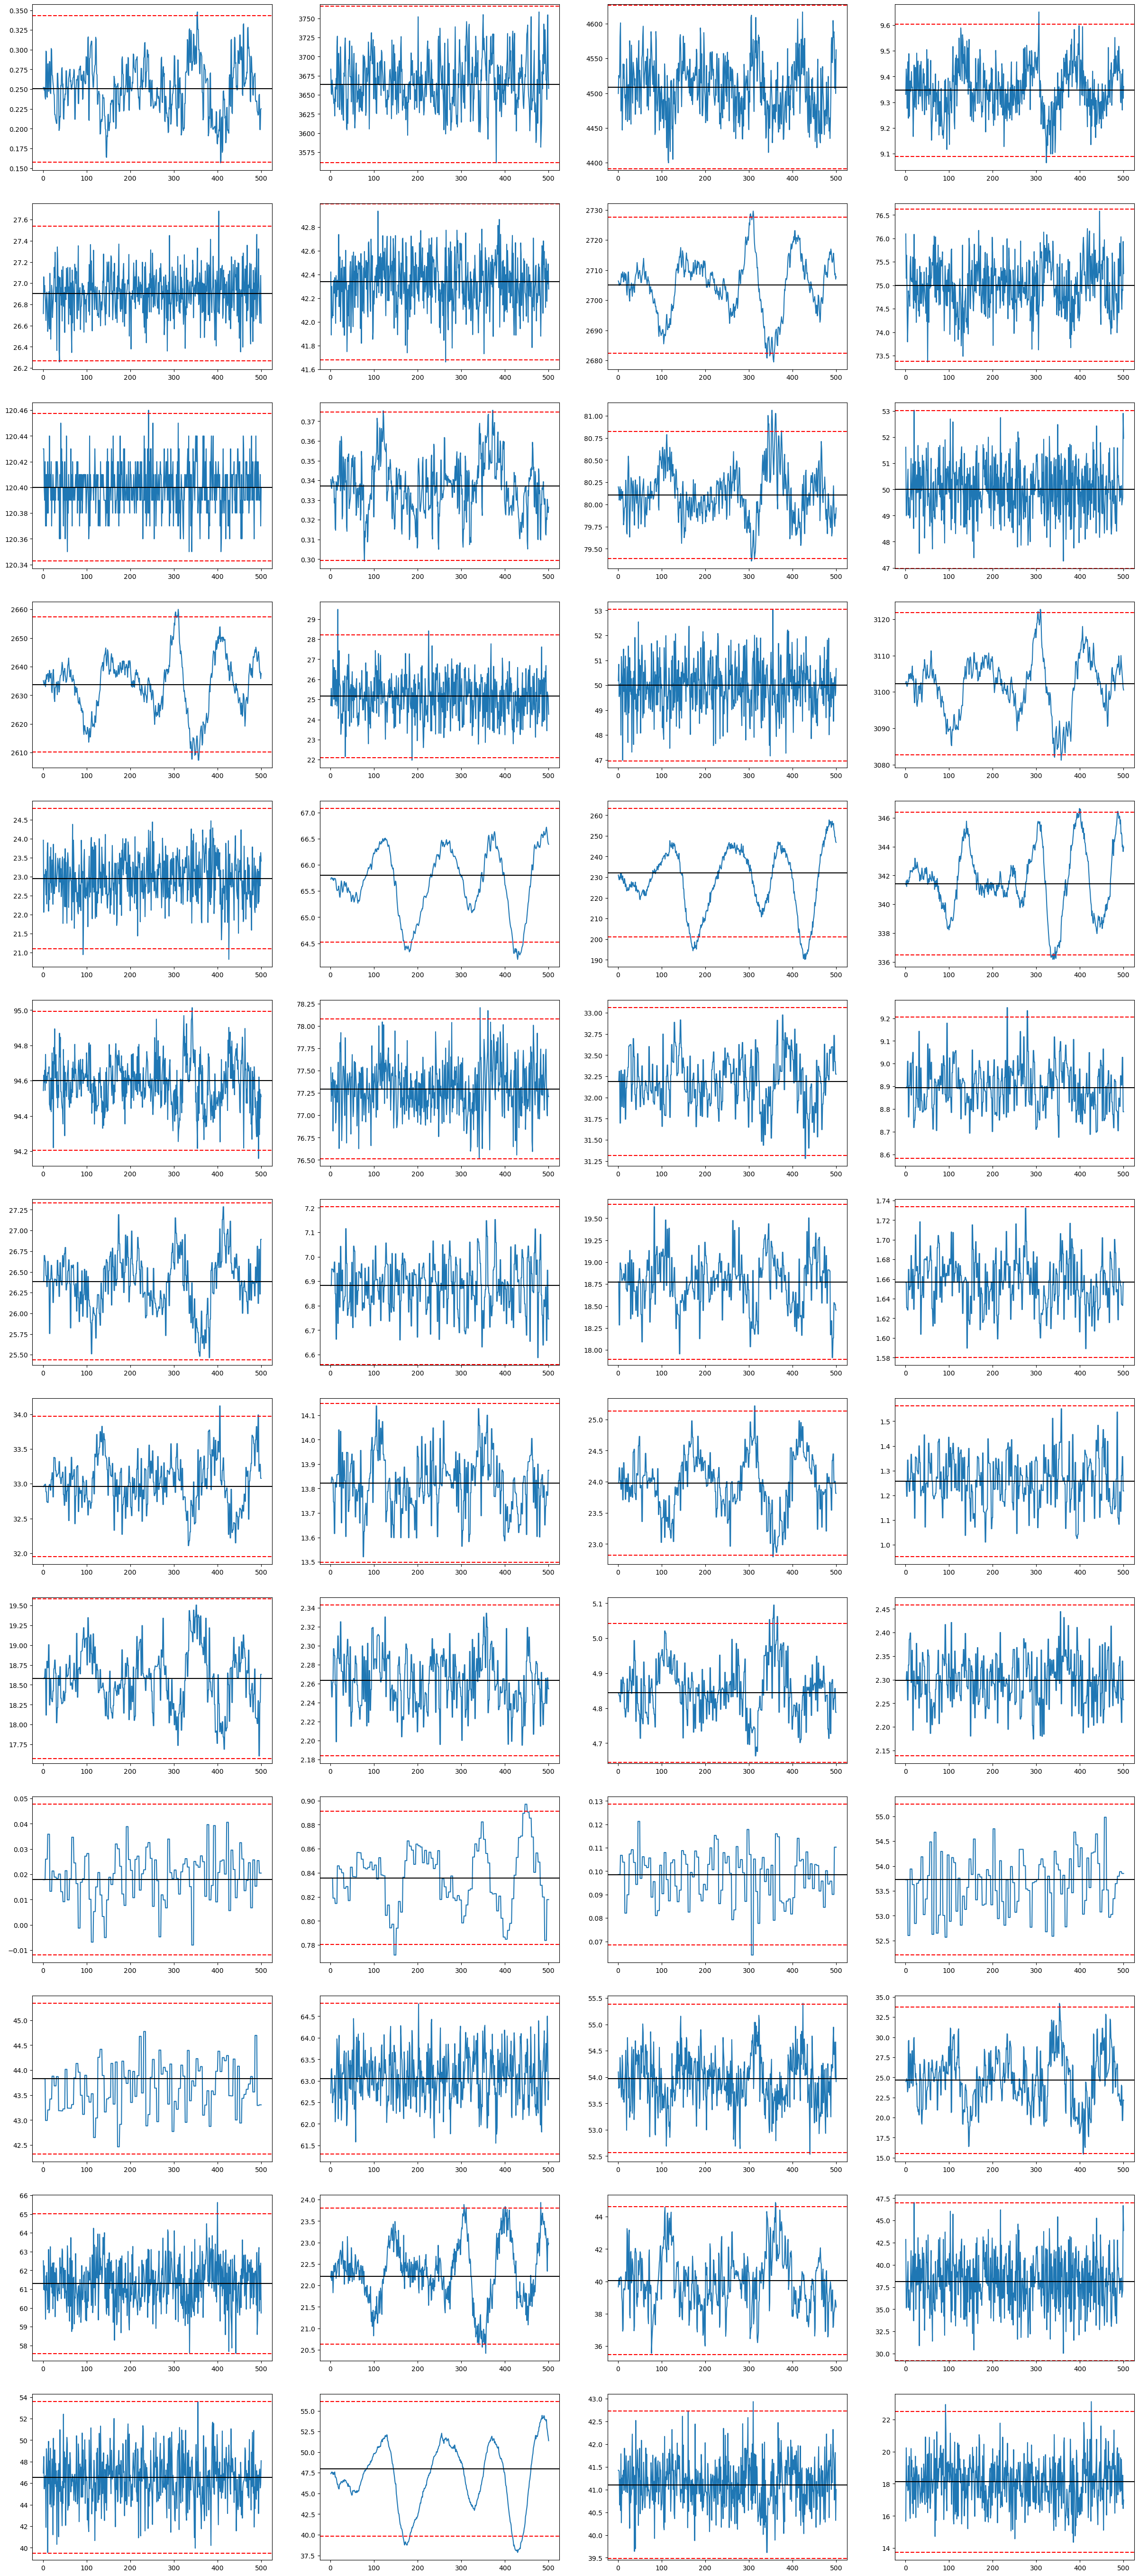

In [17]:
temp_df = DF[ (DF['faultNumber']==0) & (DF['simulationRun']==2)]

fig, ax = plt.subplots(13,4,figsize=(30,70))

for i,col in enumerate(temp_df.columns[3:]):  #select all the feature columns to plot
    ax.ravel()[i].plot(temp_df['sample'],temp_df[col])
    ax.ravel()[i].axhline(mean[i],c='k')
    ax.ravel()[i].axhline(upperLimit[i],ls='--',c='r')
    ax.ravel()[i].axhline(lowerLimit[i],ls='--',c='r')

# Faulty Case

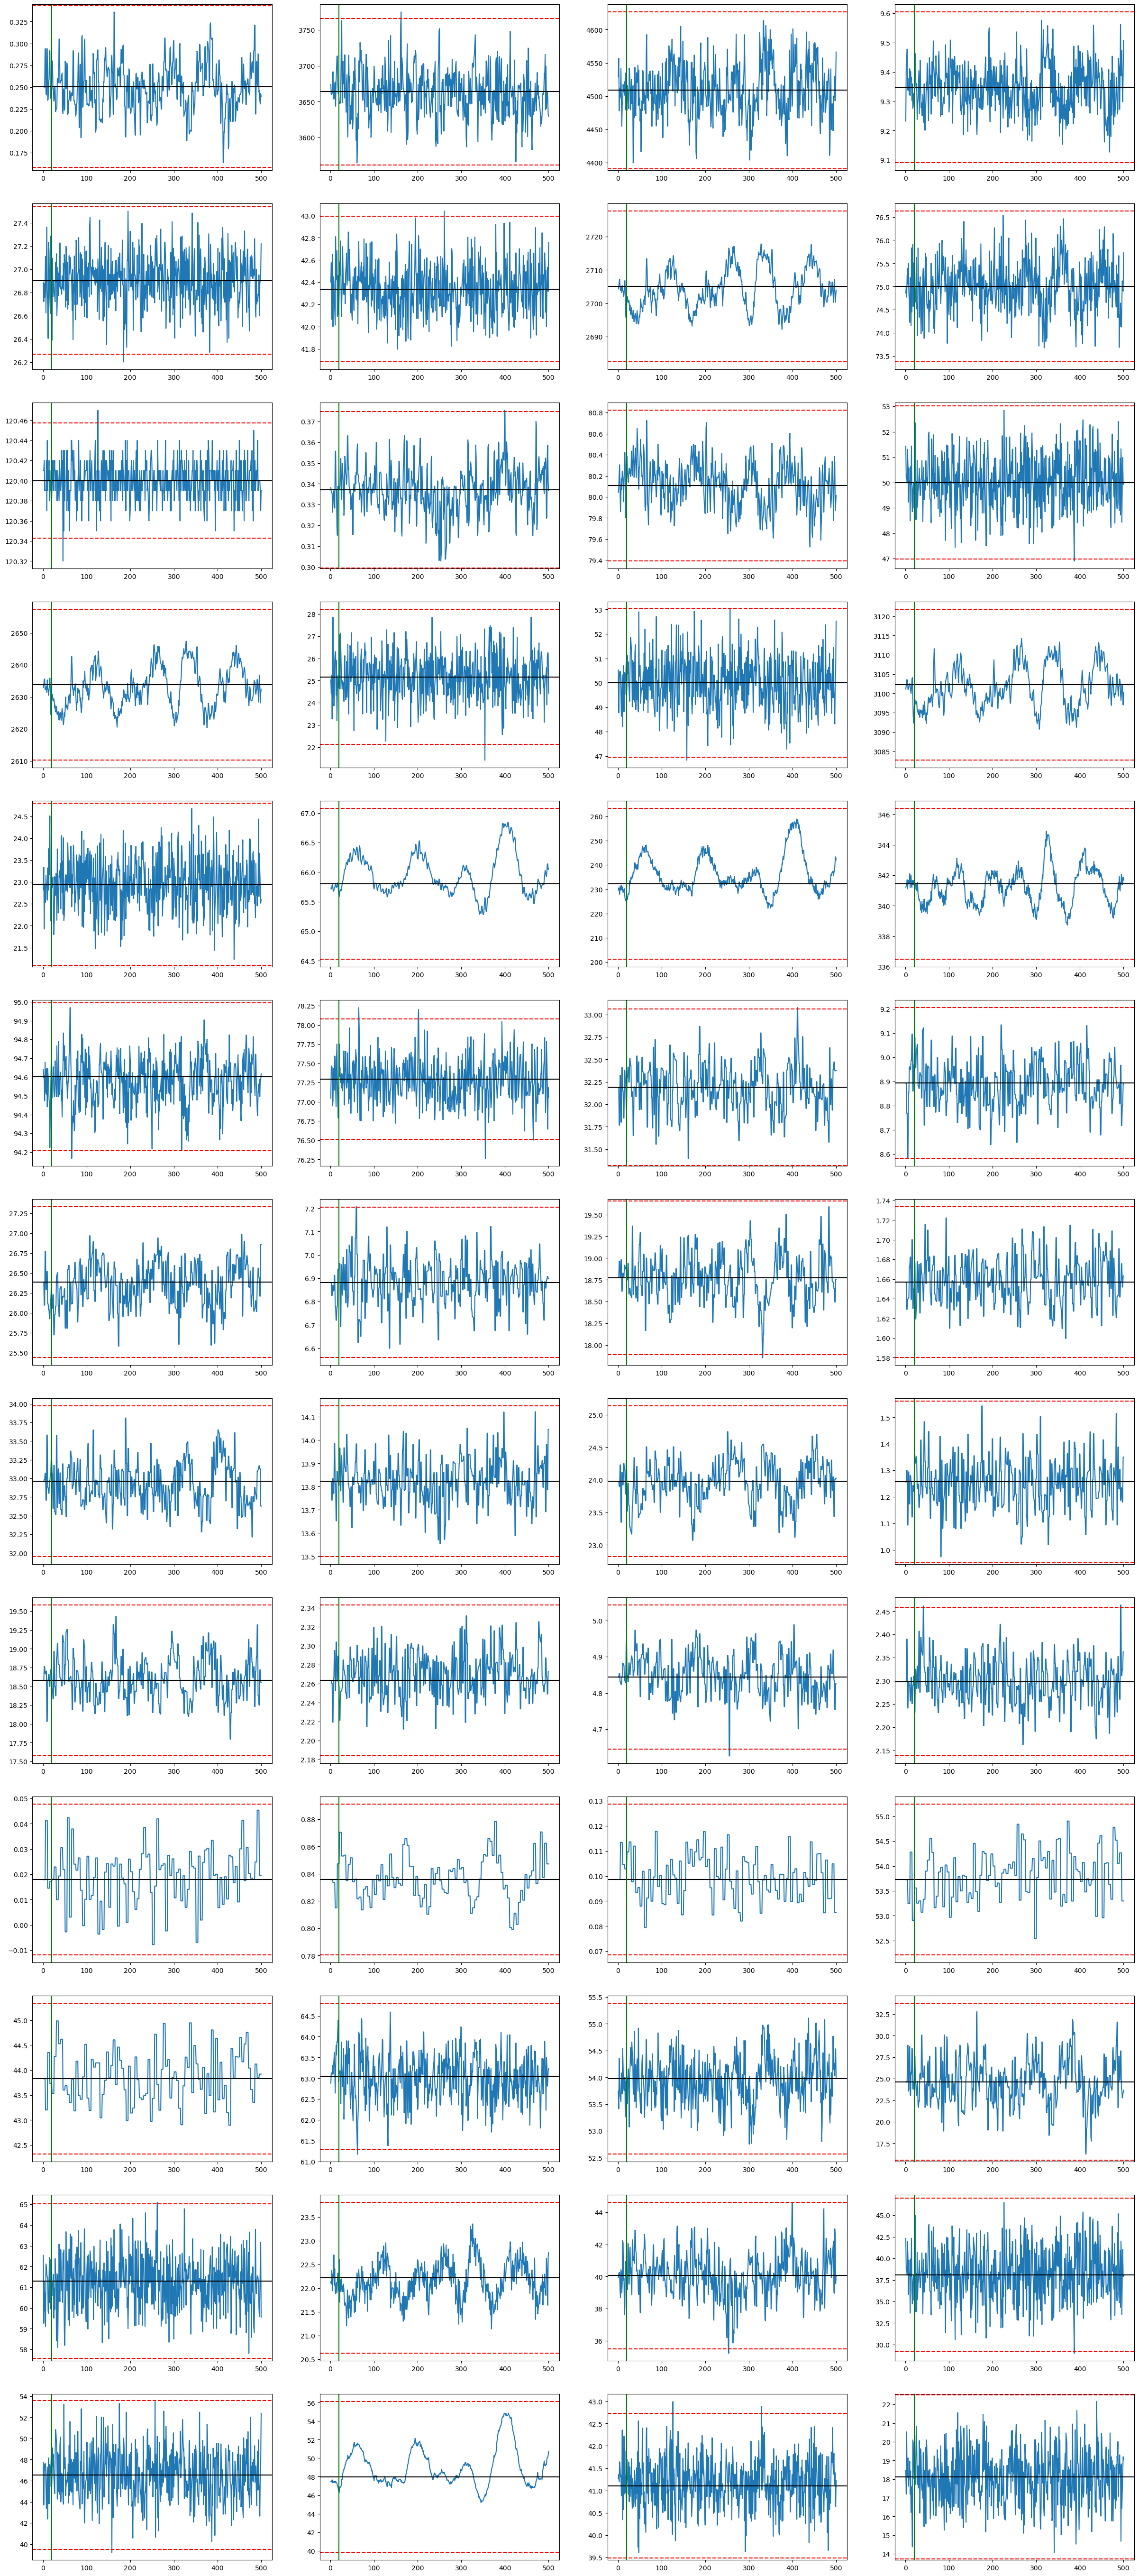

In [19]:
temp_df = DF[ (DF['faultNumber']==3) & (DF['simulationRun']==1)]

fig, ax = plt.subplots(13,4,figsize=(30,70))

for i,col in enumerate(temp_df.columns[3:]):  #select all the feature columns to plot
    ax.ravel()[i].plot(temp_df['sample'],temp_df[col])
    ax.ravel()[i].axhline(mean[i],c='k')
    ax.ravel()[i].axhline(upperLimit[i],ls='--',c='r')
    ax.ravel()[i].axhline(lowerLimit[i],ls='--',c='r')
    ax.ravel()[i].axvline(20,c='g')

### It is very hard to look at 55 variables at the sametime so, we can combine them to create a single array, if any variable goes out of bound it will generate error (i.e.=1)

In [23]:
def combine_result(temp_df,upperLimit,lowerLimit):
    decision=(temp_df.iloc[:,3:]>upperLimit[0:]) | (temp_df.iloc[:,3:]<lowerLimit[0:])
    result = np.any(decision, axis=1)
    result_float = [float(val) for val in result] 
    return result_float

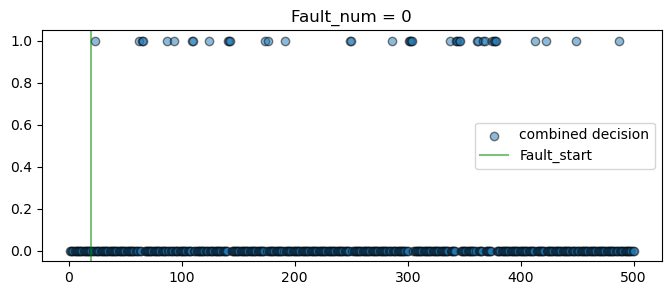

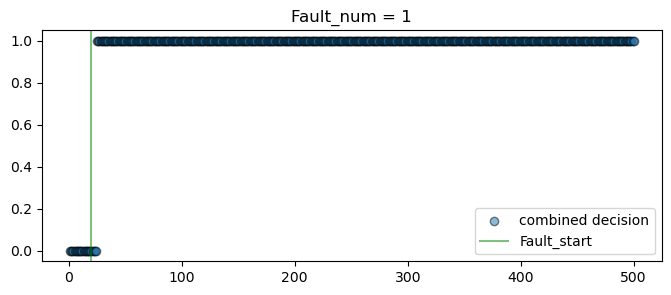

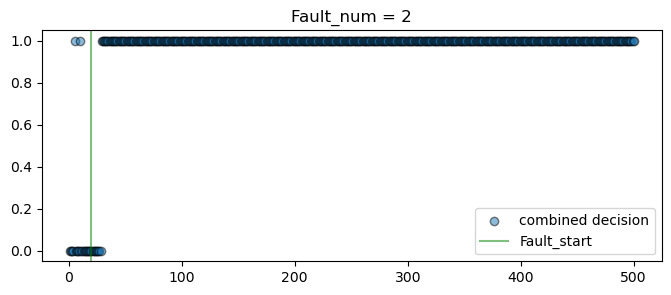

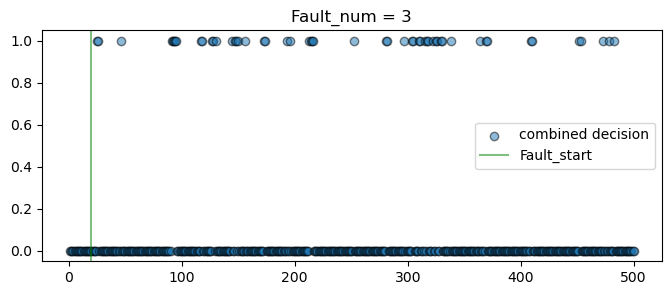

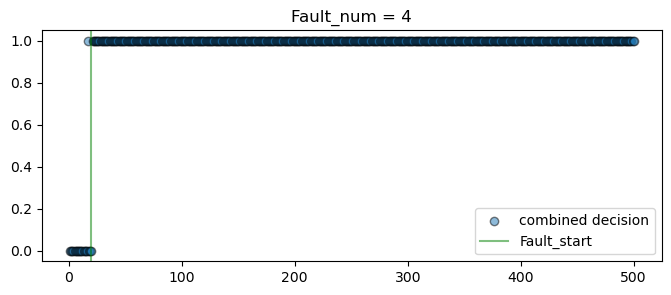

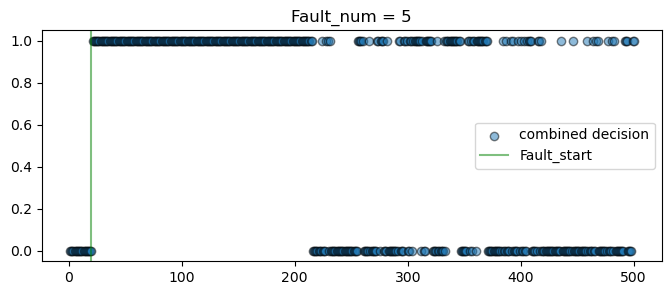

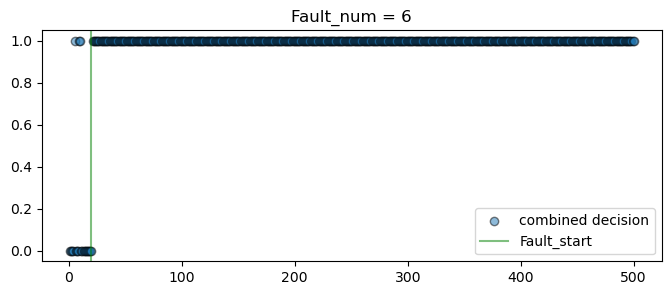

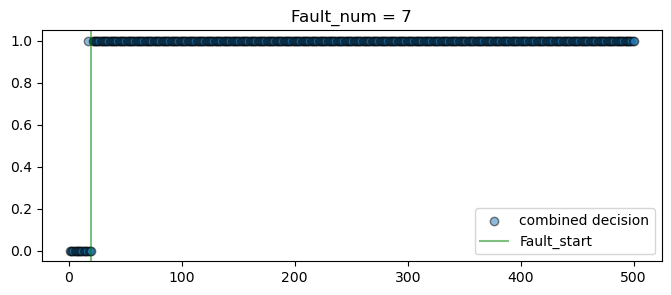

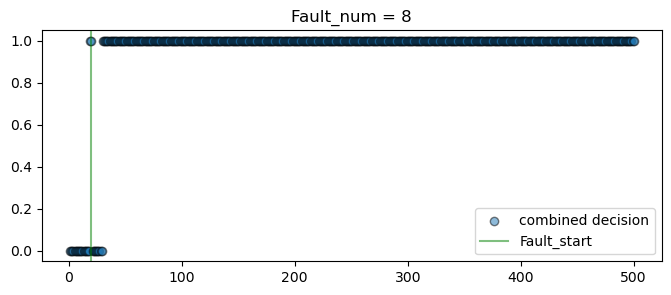

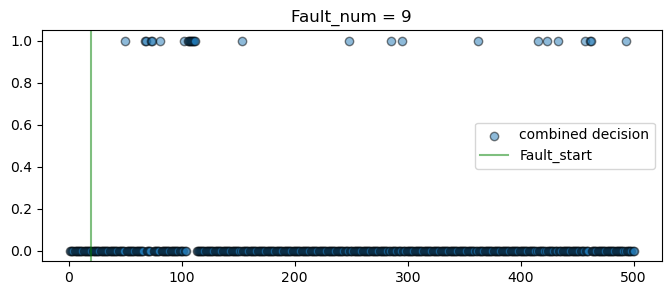

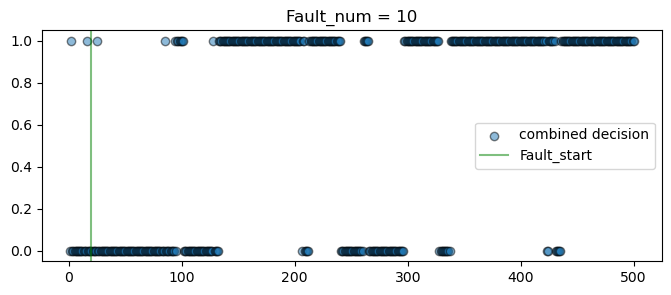

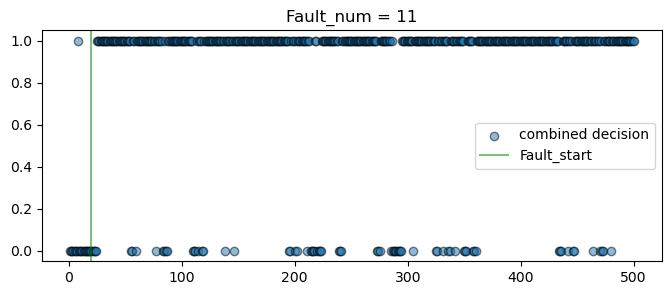

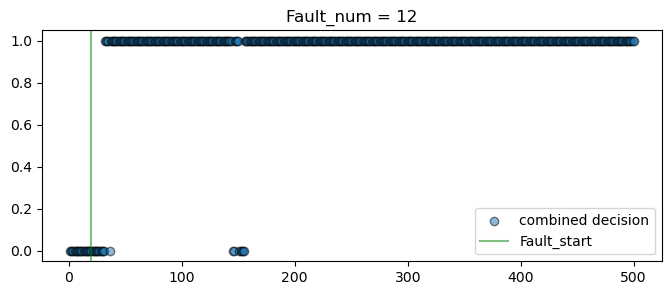

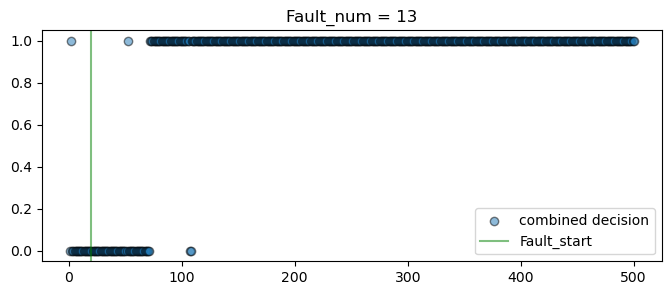

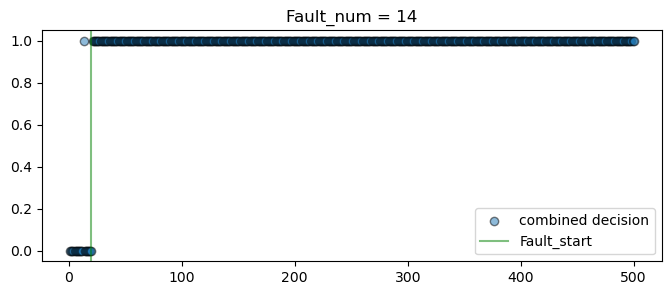

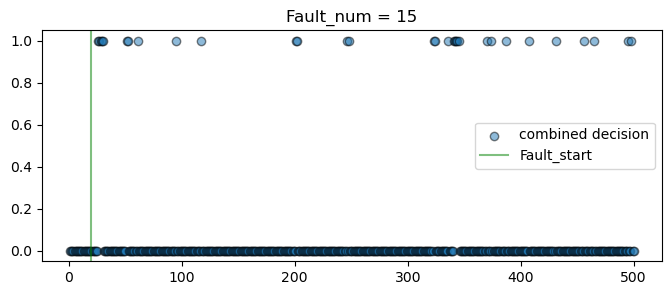

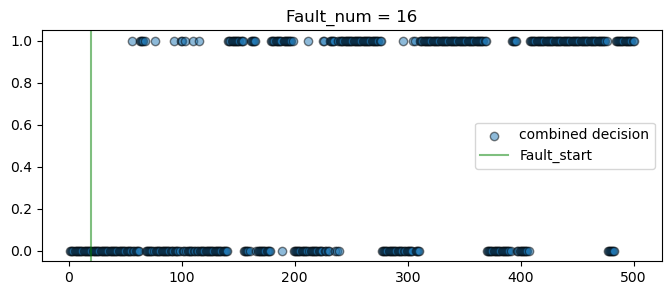

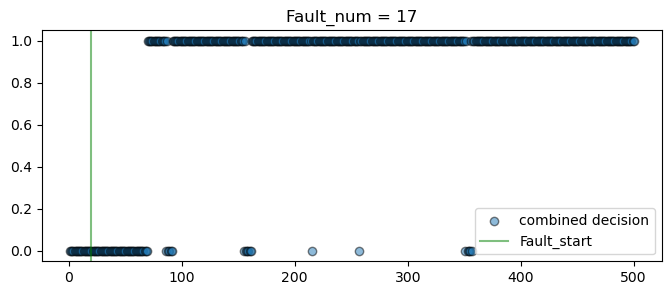

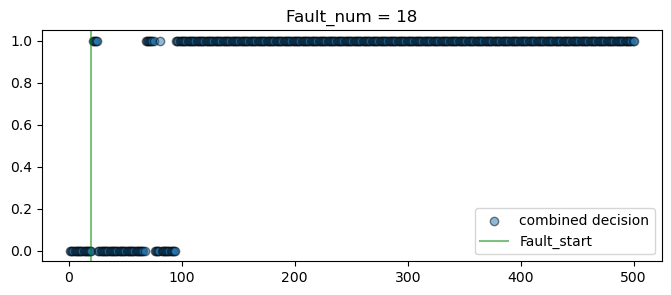

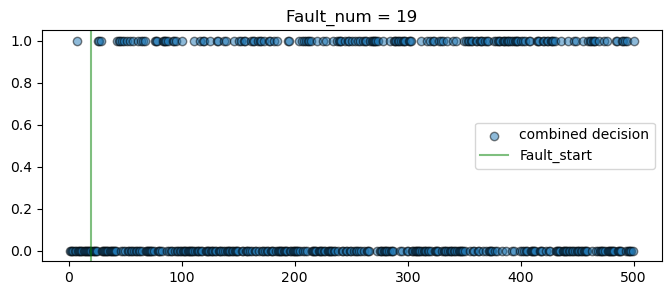

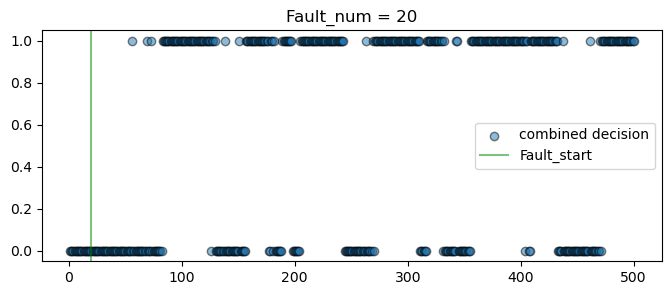

In [24]:
for Fault_num in range(0,21):
    temp_df = DF[ (DF['faultNumber']==Fault_num) & (DF['simulationRun']==np.random.randint(1,500))]
    fault_check = combine_result(temp_df,upperLimit,lowerLimit)
    #Plot
    plt.rcParams['figure.figsize'] = [8, 3]
    plt.scatter(temp_df['sample'],fault_check,label='combined decision',edgecolors='k',alpha=0.5)
    plt.axvline(20,c='g',alpha=0.5,label='Fault_start')
    plt.title(f'Fault_num = {Fault_num}')
    plt.legend()
    plt.show()

# Use F1 score matrice to Compare the performance

In [25]:
for Fnum in range(0,21):

    temp_df = DF[ (DF['faultNumber']==Fnum) & (DF['simulationRun']==np.random.randint(1,500))]
    y_pred = combine_result(temp_df,upperLimit,lowerLimit)
    if Fnum==0:
        y_true = np.repeat(0, len(y_pred))
    else:
        y_true = np.repeat(1, len(y_pred))
        y_true[0:21]=0 # Beacuse the fault was introduced after 20th sample

    # Obtain F1 score    
    from sklearn.metrics import f1_score
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f'The F1-Score for Fault_num={Fnum} is {f1}')
    # Plot confusion matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
#     disp.plot()
#     plt.title(f'Fault_num={Fnum}')
#     plt.show()

The F1-Score for Fault_num=0 is 0.4758909853249476
[[454  46]
 [  0   0]]
The F1-Score for Fault_num=1 is 0.9762267021681248
[[ 21   0]
 [  2 477]]
The F1-Score for Fault_num=2 is 0.8704947102070093
[[ 20   1]
 [ 12 467]]
The F1-Score for Fault_num=3 is 0.08982160503458678
[[ 19   2]
 [453  26]]
The F1-Score for Fault_num=4 is 0.9872835016149952
[[ 20   1]
 [  0 479]]
The F1-Score for Fault_num=5 is 0.388052452646916
[[ 19   2]
 [250 229]]
The F1-Score for Fault_num=6 is 0.9599775874489713
[[ 18   3]
 [  0 479]]
The F1-Score for Fault_num=7 is 0.9739583333333333
[[ 19   2]
 [  0 479]]
The F1-Score for Fault_num=8 is 0.8390523401789738
[[ 17   4]
 [ 11 468]]
The F1-Score for Fault_num=9 is 0.14270455631447285
[[ 21   0]
 [427  52]]
The F1-Score for Fault_num=10 is 0.4620197000621173
[[ 21   0]
 [194 285]]
The F1-Score for Fault_num=11 is 0.6205714285714286
[[ 21   0]
 [ 83 396]]
The F1-Score for Fault_num=12 is 0.8860632576793365
[[ 18   3]
 [  7 472]]
The F1-Score for Fault_num=13 is 0